In [121]:
import pandas as pd
import matplotlib.pyplot as plt 

# Créer un exmple de dictionnaire
dictionary = {
    'name1': (5, 'date1', "It is so bad"),
    'name2': (4, 'date2', 'it sucks'),
    'name3': (3, 'date2', 'A Day in the Life of a Fool'),
    'name4': (5, 'date2', 'It is very good'),
}

# Convertir le dictionnaire en DataFrame
df = pd.DataFrame(dictionary, index=['Score', 'date', 'Text']).T

df = df.reset_index().rename(columns={"index": "name"})

# df = df.reset_index().rename(columns={"index": "ID"})

print(df)

    name Score   date                         Text
0  name1     5  date1                 It is so bad
1  name2     4  date2                     it sucks
2  name3     3  date2  A Day in the Life of a Fool
3  name4     5  date2              It is very good


## EDA

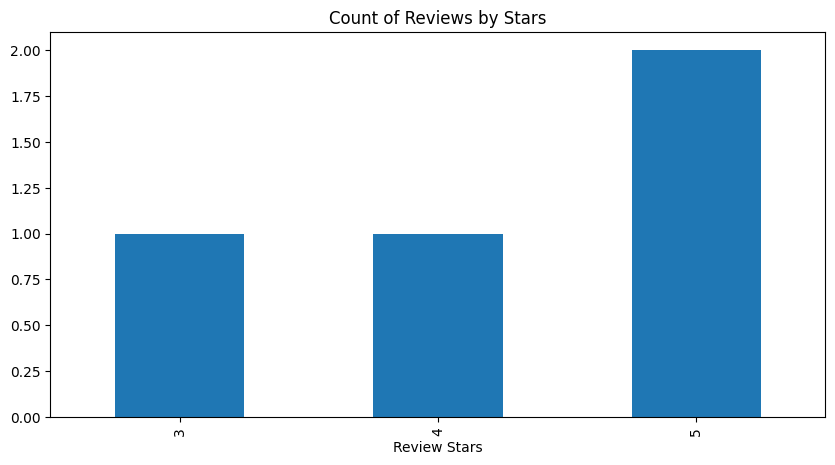

In [122]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

## Sentiment Analysis

### Roberta

In [123]:
from transformers import pipeline

In [124]:
# Sentiment Analysis with Roberta

nlp = pipeline("sentiment-analysis", model=f"cardiffnlp/twitter-roberta-base-sentiment")

# Run the polarity score on the entire dataset
res = pd.DataFrame(columns=['label', 'score'])
for i in range(len(df)):
    text = df.loc[i, 'Text']
    dict = pd.DataFrame(nlp(text))
    dict['id'] = i
    res = pd.concat([res, dict], axis=0)

# Remplacement des valeurs
res['label'] = res['label'].replace('LABEL_0', 'NEGATIVE')
res['label'] = res['label'].replace('LABEL_1', 'NEUTRAL')
res['label'] = res['label'].replace('LABEL_2', 'POSITIVE')
res["id"] = res['id'].astype(int)
res = res.rename(columns={"label": "label (roberta)", "score": "score (roberta)"})

# Merge the two dataframes
df = df.merge(res, left_index=True, right_on='id')
print(df)


    name Score   date                         Text label (roberta)   
0  name1     5  date1                 It is so bad        NEGATIVE  \
0  name2     4  date2                     it sucks        NEGATIVE   
0  name3     3  date2  A Day in the Life of a Fool         NEUTRAL   
0  name4     5  date2              It is very good        POSITIVE   

   score (roberta)  id  
0         0.961788   0  
0         0.943688   1  
0         0.485192   2  
0         0.983293   3  


### Kaludi/Reviews-Sentiment-Analysis

In [125]:
nlp = pipeline("sentiment-analysis", model=f"Kaludi/Reviews-Sentiment-Analysis")

# Run the polarity score on the entire dataset
res = pd.DataFrame(columns=['label', 'score'])
for i in range(len(df)):
    text = df.loc[i, 'Text']
    dict = pd.DataFrame(nlp(text))
    dict['id'] = i
    res = pd.concat([res, dict], axis=0)

# Remplacement des valeurs
"""res['label'] = res['label'].replace('LABEL_0', 'NEGATIVE')
res['label'] = res['label'].replace('LABEL_1', 'NEUTRAL')
res['label'] = res['label'].replace('LABEL_2', 'POSITIVE')"""

res["id"] = res['id'].astype(int)
res = res.rename(columns={"label": "label (reviews)", "score": "score (reviews)"})

# Merge the two dataframes
df = df.merge(res, left_index=True, right_on='id')
print(df)


ValueError: text input must of type `str` (single example), `List[str]` (batch or single pretokenized example) or `List[List[str]]` (batch of pretokenized examples).

In [126]:
nlp = pipeline("sentiment-analysis", model=f"Kaludi/Reviews-Sentiment-Analysis")

res = pd.DataFrame(columns=['label', 'score'])
for i in range(len(df)):
    text = str(df.loc[i, 'Text'])
    print(text)
    # dict = pd.DataFrame(nlp(text))
    #dict['id'] = i
    # res = pd.concat([res, dict], axis=0)


0                   It is so bad
0                       it sucks
0    A Day in the Life of a Fool
0                It is very good
Name: Text, dtype: object


KeyError: 1

## Data Visualization